In [1]:
library(ggplot2)
library(dplyr)
library(lme4)
library(lmerTest)
library(xtable)
library(glmmTMB)
library(cowplot)
library(grid)

pallette = c("#318480", "#b4464f")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step


Warning message in checkMatrixPackageVersion():
"Package version inconsistency detected.
TMB was built with Matrix version 1.2.18
Current Matrix version is 1.3.2
Please re-install 'TMB' from source using install.packages('TMB', type = 'source') or ask CRAN for a binary version of 'TMB' matching CRAN's 'Matrix' package"

********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



# Humphreys & Bock 2005

In [2]:
hb_df <- read.csv("../evalsets/HumphreysBock2005/items.csv.reformat")
hb_df <- tidyr::separate(hb_df, condition, c("subj", "local", "prep"), sep=1:3)
hb_df$type <- as.factor(substr(hb_df$model, 5, 5))
hb_df <- subset(hb_df, hb_df$subj == "C" & hb_df$local == "P")
hb_df$prep <- as.factor(hb_df$prep)
hb_df

coding_matrix <- matrix(c(1, -1), ncol=1)
contrasts(hb_df$prep) <- coding_matrix
means <- hb_df %>% group_by(model, type, prep) %>% summarize(sample = mean(sample), max = mean(max))

means


,X,item,subj,local,prep,model,max,sample,type
,<int>,<int>,<chr>,<chr>,<fct>,<chr>,<int>,<dbl>,<fct>
1,0,0,C,P,D,lstmlmaug0,100,64.85472,l
2,1,0,C,P,D,lstmlmaug1,100,71.96681,l
3,2,0,C,P,D,lstmlmaug2,100,53.90963,l
4,3,0,C,P,D,lstmlmaug3,100,57.35445,l
5,4,0,C,P,D,lstmlmaug4,100,75.79094,l
6,5,0,C,P,D,lstmaugment0,0,47.01671,a
7,6,0,C,P,D,lstmaugment1,0,49.34341,a
8,7,0,C,P,D,lstmaugment2,100,61.41021,a
9,8,0,C,P,D,lstmaugment3,0,25.83306,a


`summarise()` has grouped output by 'model', 'type'. You can override using the `.groups` argument.



model,type,prep,sample,max
<chr>,<fct>,<fct>,<dbl>,<dbl>
lstmaugment0,a,C,67.13891,83.33333
lstmaugment0,a,D,72.60138,94.44444
lstmaugment1,a,C,63.05766,83.33333
lstmaugment1,a,D,71.82006,88.88889
lstmaugment2,a,C,74.30208,94.44444
lstmaugment2,a,D,73.65982,94.44444
lstmaugment3,a,C,68.15521,83.33333
lstmaugment3,a,D,64.76619,77.77778
lstmaugment4,a,C,69.96964,94.44444


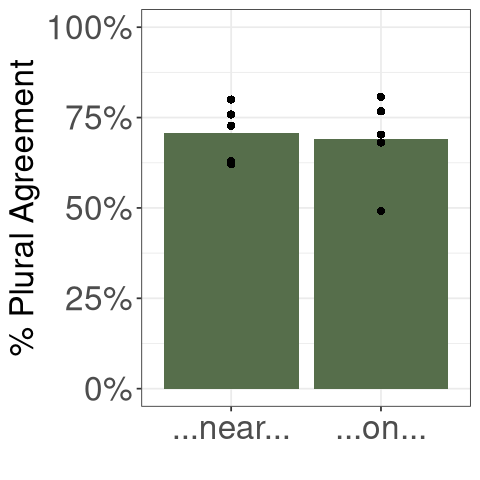

In [3]:
options(repr.plot.width=4, repr.plot.height=4)
f <- ggplot(subset(hb_df, type=="l"), aes(x=prep, y=sample/100)) + 
geom_bar(stat="summary", position="dodge", fun=mean, fill="#566e4b") + 
geom_point(data=subset(means, type=="l"), shape=16, size=2) +
labs(x="", y="% Plural Agreement", fill="") +
theme_bw() +
scale_x_discrete(labels=c(C="...near...", D="...on...")) +
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1.0)) +
theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))
legend <- cowplot::get_legend(f)
f <-f + theme(legend.position = "none")
f
ggsave("Humphreys_lmonly.png", width=4, height=4)

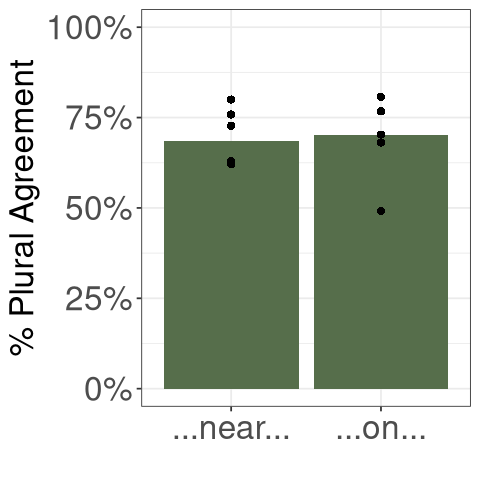

In [4]:
options(repr.plot.width=4, repr.plot.height=4)
f <- ggplot(subset(hb_df, type=="a"), aes(x=prep, y=sample/100)) + 
geom_bar(stat="summary", position="dodge", fun=mean, fill="#566e4b") + 
geom_point(data=subset(means, type=="l"), shape=16, size=2) +
labs(x="", y="% Plural Agreement", fill="") +
theme_bw() +
scale_x_discrete(labels=c(C="...near...", D="...on...")) +
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1.0)) +
theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))
legend <- cowplot::get_legend(f)
f <-f + theme(legend.position = "none")
f
ggsave("Humphreys_ccg.png", width=4, height=4)

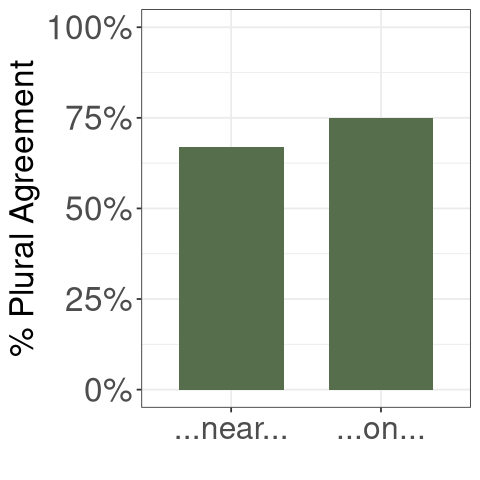

In [5]:
options(repr.plot.width=4, repr.plot.height=4)


hb_human <- data.frame(prep=c("Collective", "Distributive"),
                             plural=c(67,75)/100)

ggplot(data=hb_human, aes(y=plural, x=prep)) +
geom_bar(stat="identity", position="dodge", fill="#566e4b", width=0.7) + 
theme(legend.position="None") +
scale_x_discrete(labels=c("...near...", 
                          "...on..." ))  +
labs(y="% Plural Agreement", x = "", fill="Notional Reading Bias") +
theme(axis.text=element_text(size=16), strip.text=element_text(size=16), axis.title.x=element_text(hjust=c(-0)), legend.text=element_text(size=16)) +
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1)) +

theme_bw() +
theme(axis.text.x=element_text(size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))
ggsave("Humphreys_human.png", width=4, height=4)

In [6]:
hb_lm <- glmmTMB(data=subset(hb_df, type=="l"), 
                  sample/100 ~ prep + (1 | item) + (1 | model),
                 family=beta_family())
summary(hb_lm)

hb_a <- glmmTMB(data=subset(hb_df, type=="a"), 
                  sample/100 ~ prep + (1 | item) + (1 | model),
                 family=beta_family())
summary(hb_a)


hb <- glmmTMB(data=hb_df, 
                  sample/100 ~ prep * type + (1 | item) + (1 | model),
                 family=beta_family())

summary(hb)

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: beta  ( logit )
Formula:          sample/100 ~ prep + (1 | item) + (1 | model)
Data: subset(hb_df, type == "l")

     AIC      BIC   logLik deviance df.resid 
  -286.9   -270.9    148.4   -296.9      175 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.1353   0.3678  
 model  (Intercept) 0.1628   0.4035  
Number of obs: 180, groups:  item, 18; model, 5

Overdispersion parameter for beta family (): 20.9 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.88953    0.20348   4.371 1.23e-05 ***
prep1        0.04657    0.03531   1.319    0.187    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: beta  ( logit )
Formula:          sample/100 ~ prep + (1 | item) + (1 | model)
Data: subset(hb_df, type == "a")

     AIC      BIC   logLik deviance df.resid 
  -196.3   -180.3    103.2   -206.3      175 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.165169 0.4064  
 model  (Intercept) 0.007345 0.0857  
Number of obs: 180, groups:  item, 18; model, 5

Overdispersion parameter for beta family (): 11.1 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.83507    0.11360   7.351 1.96e-13 ***
prep1       -0.02992    0.04625  -0.647    0.518    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: beta  ( logit )
Formula:          sample/100 ~ prep * type + (1 | item) + (1 | model)
Data: hb_df

     AIC      BIC   logLik deviance df.resid 
  -812.9   -774.3    415.5   -830.9      531 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.08564  0.2926  
 model  (Intercept) 0.09083  0.3014  
Number of obs: 540, groups:  item, 18; model, 15

Overdispersion parameter for beta family (): 15.1 

Conditional model:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.857656   0.156750   5.471 4.46e-08 ***
prep1       -0.028038   0.040245  -0.697   0.4860    
typel        0.008747   0.199094   0.044   0.9650    
typew        0.398757   0.199771   1.996   0.0459 *  
prep1:typel  0.073973   0.057201   1.293   0.1959    
prep1:typew  0.094784   0.059310   1.598   0.1100    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Parker & An 2018

In [7]:
pa_df <- read.csv("../evalsets/ParkerAn2018/items.comp.csv.reformatc")

pa_df$type <- as.factor(substr(pa_df$model,5, 5))
pa_df <- tidyr::separate(pa_df, condition, c("argument", "attr", "gram"), sep="_")

coding_matrix <- matrix(c(1, -1), ncol=1)
pa_df$argument <- as.factor(pa_df$argument)
pa_df$attr <- as.factor(pa_df$attr)
pa_df$gram <- as.factor(pa_df$gram)

contrasts(pa_df$argument) <- coding_matrix
contrasts(pa_df$attr) <- coding_matrix
contrasts(pa_df$gram) <- coding_matrix

pa_df <- tidyr::gather(pa_df, "pos", "surp", 9:18)
pa_df$pos <- as.numeric(substr(pa_df$pos, 10,10))

pa_df$pos_adj <- mapply(function(x, y) {
    return(ifelse(x == "CORE" & y > 2, y + 2, y + 1))
}, pa_df$argument, pa_df$pos)

pa_df$pos_adj <- as.numeric(lapply(pa_df$pos_adj, function(x) return(ifelse(x > 9, NA, x))))
pa_df <- subset(pa_df, !is.na(pa_df$pos_adj))
pa_df

,X,item,argument,attr,gram,model,len,type,pos,surp,pos_adj
,<int>,<int>,<fct>,<fct>,<fct>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>
1,0,0,OBLIQUE,S,G,lstmlmaug0,14,l,0,12.90838,1
2,1,0,OBLIQUE,S,G,lstmlmaug1,14,l,0,12.68866,1
3,2,0,OBLIQUE,S,G,lstmlmaug2,14,l,0,12.66669,1
4,3,0,OBLIQUE,S,G,lstmlmaug3,14,l,0,12.56073,1
5,4,0,OBLIQUE,S,G,lstmlmaug4,14,l,0,12.60944,1
6,5,0,OBLIQUE,S,G,lstmaugment0,14,a,0,12.12772,1
7,6,0,OBLIQUE,S,G,lstmaugment1,14,a,0,12.44468,1
8,7,0,OBLIQUE,S,G,lstmaugment2,14,a,0,12.20644,1
9,8,0,OBLIQUE,S,G,lstmaugment3,14,a,0,12.52382,1


In [8]:
plot_pa_spr <- function(dataset, verb, xlim, ylim, no_leg=FALSE) {
    plt = ggplot(dataset, aes(x=pos_adj, y=surp, color=attr, linetype=argument, group=interaction(attr, argument))) +  
    stat_summary(geom="point", size=4) +
    stat_summary(geom="line") +
    stat_summary(geom="errorbar", width=0.2) +
    labs(x="", y="Surprisal (bits)", color="", linetype="") +
    scale_color_manual(labels=c(P="Mismatch (\"...girls...\")", S="Match (\"...girl...\")"), values=pallette) +
    scale_linetype_discrete(labels=c(CORE="Core Argument (RC)", OBLIQUE="Oblique Argument (PP)")) +
    scale_x_continuous(labels=c("The", "waitress", "who", "sat", "(near)", "the", "girl(s)", "unsurprisingly", verb, "unhappy..."), breaks=0:9, limits=c(0,10)) +
    coord_cartesian(ylim=ylim, xlim=xlim) +
    theme_bw() + 
    theme(axis.text.x=element_text(angle=45, hjust=1, size=20), axis.text.y=element_text(size=20),
          axis.title.y=element_text(size=20),
          strip.text=element_text(size=20), legend.text=element_text(size=20), panel.grid.minor=element_blank())
    
    if (no_leg) {
        plt = plt + theme(legend.position="none")
    }
    plt
}


No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



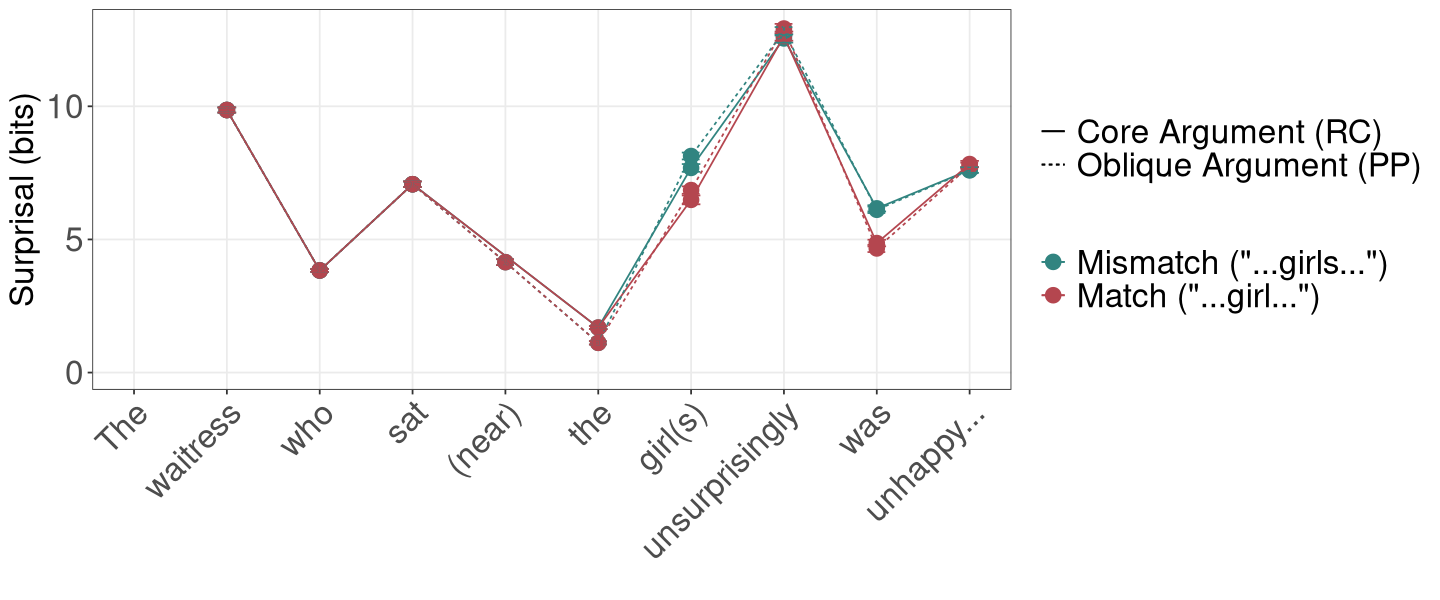

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



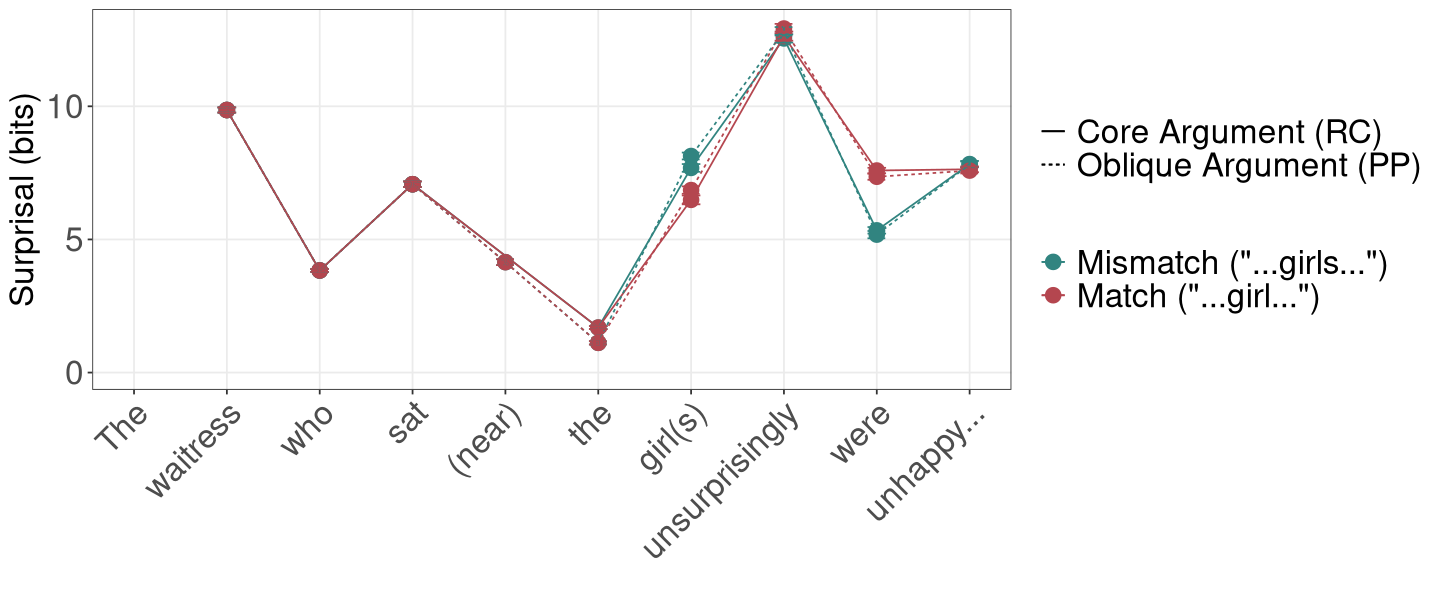

In [9]:
options(repr.plot.width=12, repr.plot.height=5)

plot_pa_spr(subset(pa_df, type=="l" & gram=="G"), "was", c(0,9), c(0,13))

ggsave("ParkerAn_G_lmonly.png", width= 12, height = 5)


plot_pa_spr(subset(pa_df, type=="l" & gram=="U"), "were", c(0,9), c(0,13))
ggsave("ParkerAn_U_lmonly.png", width= 12, height = 5)

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



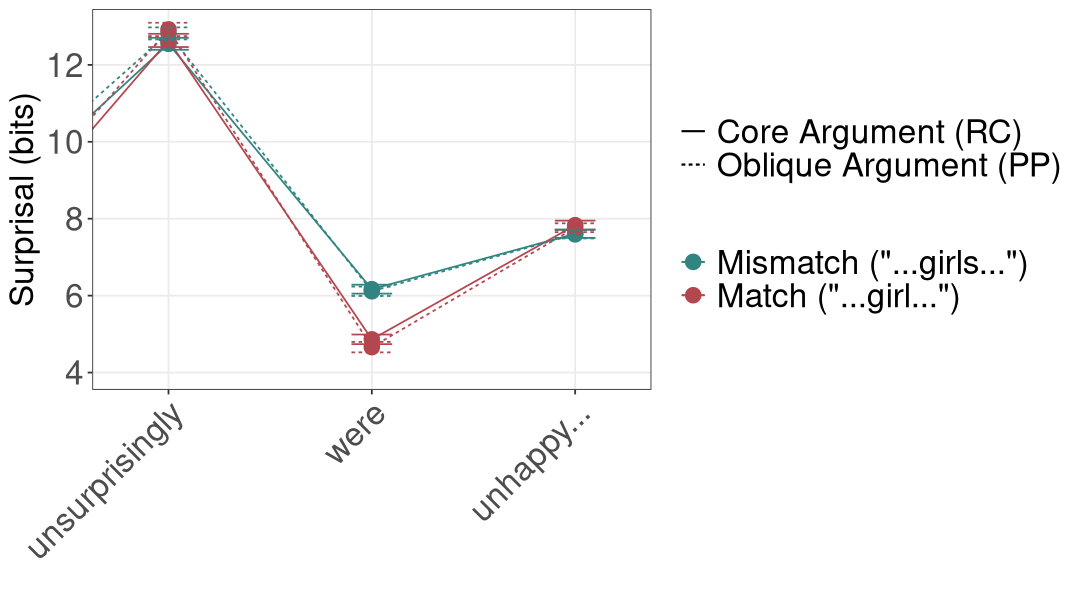

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



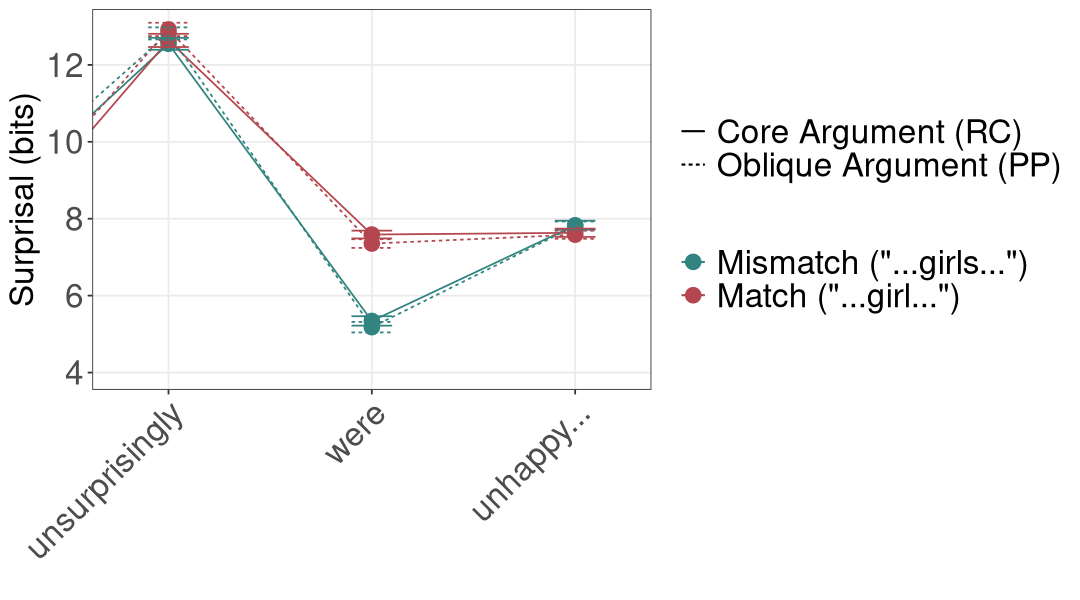

In [10]:
options(repr.plot.width=9, repr.plot.height=5)

plot_pa_spr(subset(pa_df, type=="l" & gram=="G"), "were", c(6.75,9.25), c(4,13))
ggsave("ParkerAn_G_lmonly_popout.png", width= 9, height = 5)

plot_pa_spr(subset(pa_df, type=="l" & gram=="U"), "were", c(6.75,9.25), c(4,13)) 
ggsave("ParkerAn_U_lmonly_popout.png", width= 9, height = 5)

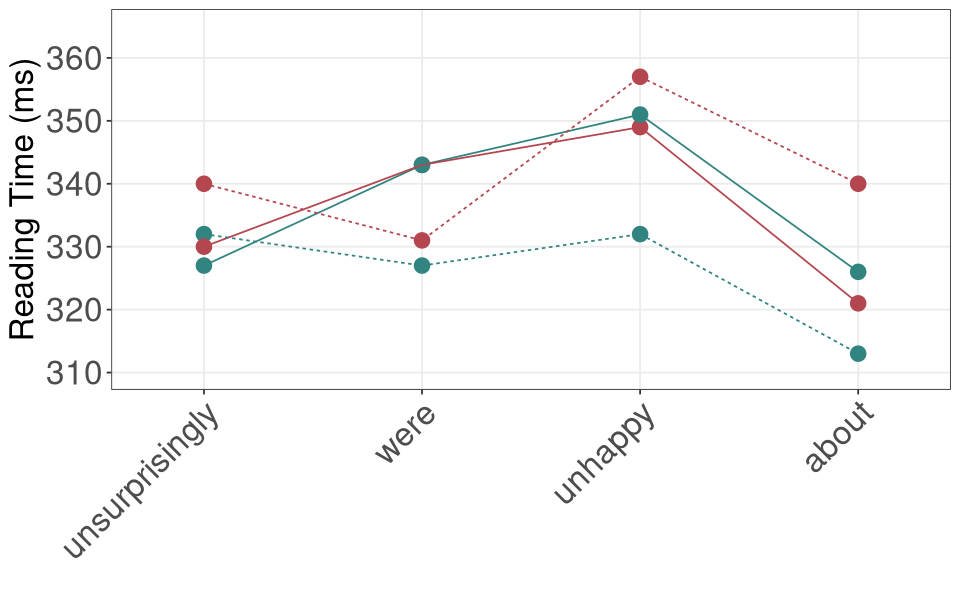

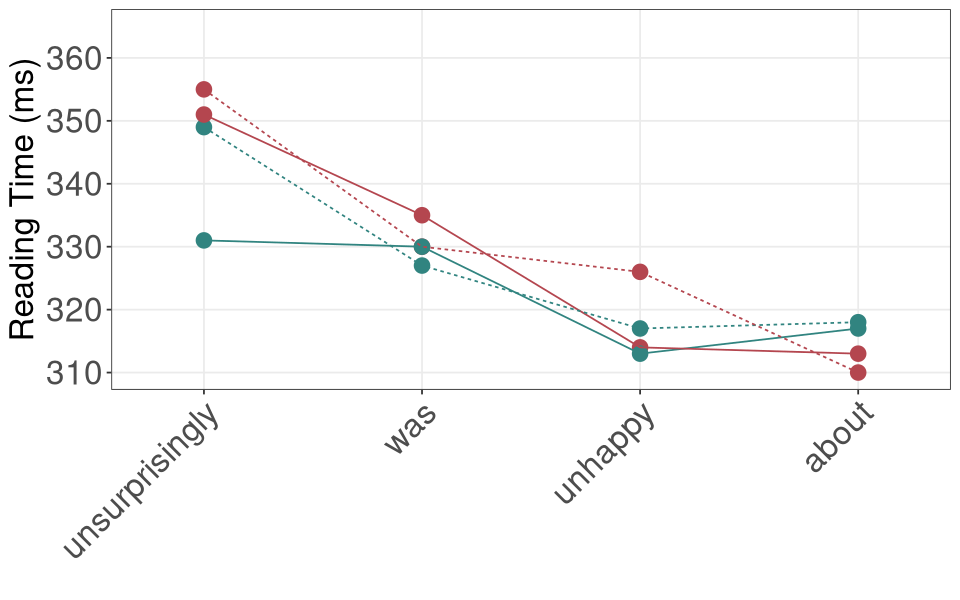

In [11]:
options(repr.plot.width=8, repr.plot.height=5)


pa_u_human <- data.frame(word=rep(c(0, 1 ,2 , 3), 4),
                         match=rep(c(rep(c("match"), 4), rep(c("mismatch"), 4)),2),
                         argument=rep(c(rep(c("oblique"), 8), rep(c("core"), 8))),
                         rt=c(340, 331, 357, 340, 332, 327, 332, 313, 330, 343, 349, 321, 327, 343, 351, 326))
pa_g_human <- data.frame(word=rep(c(0, 1, 2, 3), 4),
                         match=rep(c(rep(c("match"), 4), rep(c("mismatch"), 4)),2),
                         argument=rep(c(rep(c("oblique"), 8), rep(c("core"), 8))),
                         rt=c(355, 330, 326, 310, 349, 327, 317, 318, 351, 335, 314, 313, 331, 330, 313, 317))

pa_u_human$match <- factor(pa_u_human$match, levels = c("mismatch", "match"))
pa_g_human$match <- factor(pa_g_human$match, levels = c("mismatch", "match"))


plot_pa_human <- function(dataset, verb) {
    ggplot(dataset, aes(x=word, y=rt, color=match,linetype=argument, group=interaction(match, argument))) +  
    geom_point(stat="identity", size=4) +
    geom_line(stat="identity") +
    labs(x="", y="Reading Time (ms)", color="", linetype="") +
    scale_color_manual(labels=c(mismatch="Mismatch (\"...girls...\")", match="Match (\"...girl...\")"), values=pallette) +
    scale_linetype_discrete(labels=c(CORE="Core Argument (RC)", OBLIQUE="Oblique Argument (PP)")) +
    scale_x_continuous(labels=c("unsurprisingly", verb, "unhappy", "about"), breaks=0:3, limits=c(0,3)) +
    coord_cartesian(ylim=c(310, 365), xlim=c(-0.25,3.25)) +
    theme_bw() + 
    theme(axis.text.x=element_text(angle=45, hjust=1, size=20), axis.text.y=element_text(size=20),
          axis.title.y=element_text(size=20),
          strip.text=element_text(size=20), legend.text=element_text(size=20), 
          panel.grid.minor=element_blank(), legend.position = "none")
}


plot_pa_human(pa_u_human, "were")
ggsave("ParkerAn_U_human.png", width=8, height=5)


plot_pa_human(pa_g_human, "was")
ggsave("ParkerAn_G_human.png", width=8, height=5)

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



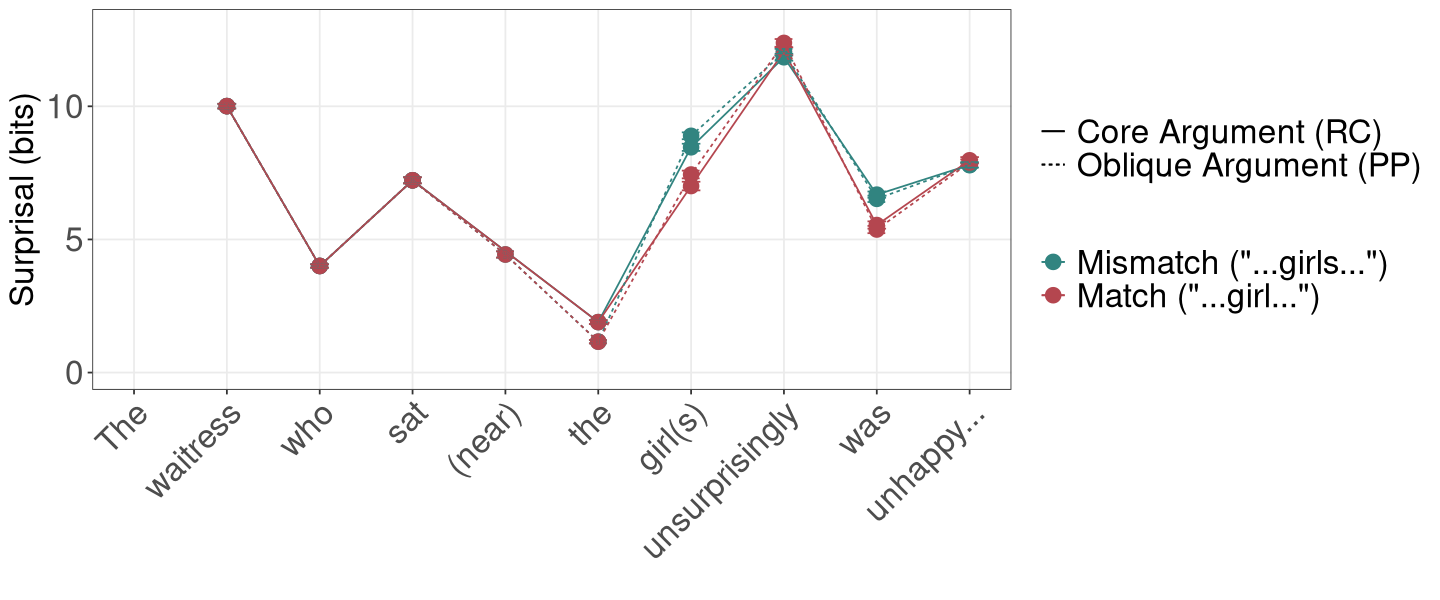

In [12]:
options(repr.plot.width=12, repr.plot.height=5)

plot_pa_spr(subset(pa_df, type=="a" & gram=="G"), "was", c(0,9), c(0,13))
ggsave("ParkerAn_G_ccgaug.png", width= 12, height = 5)

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



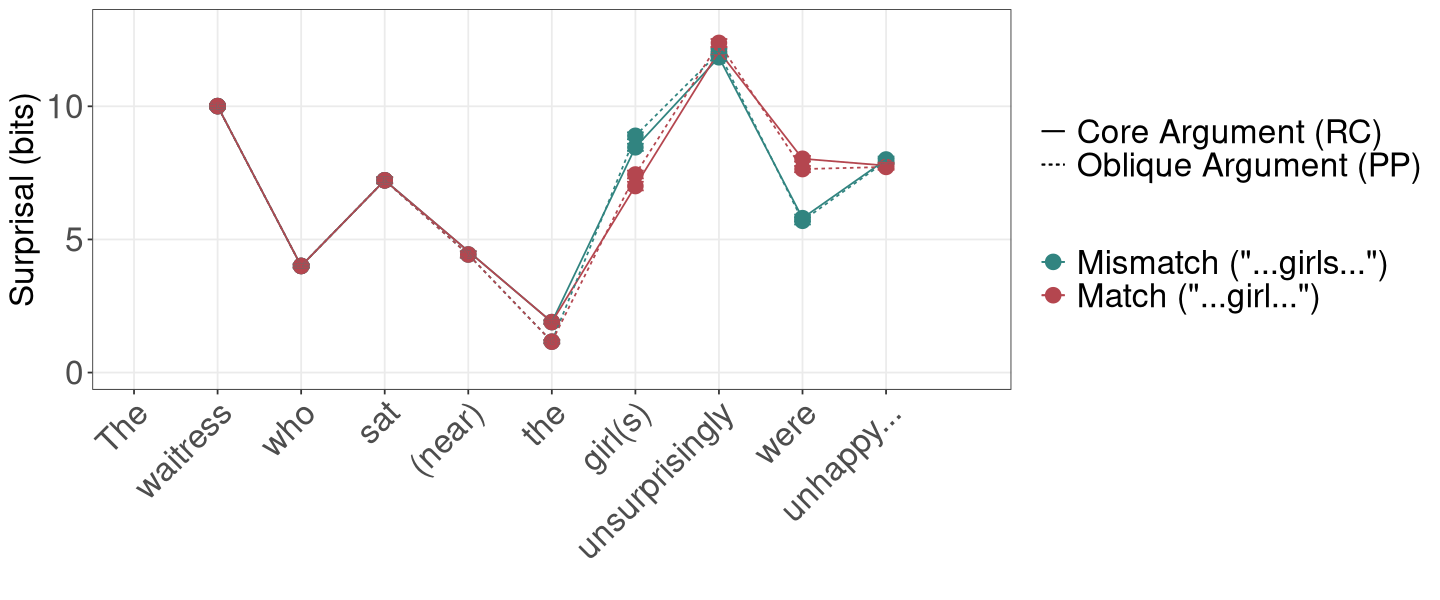

In [13]:
options(repr.plot.width=12, repr.plot.height=5)


plot_pa_spr(subset(pa_df, type=="a" & gram=="U"), "were", c(0,10), c(0,13))
ggsave("ParkerAn_U_ccgaug.png", width= 12, height = 5)

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



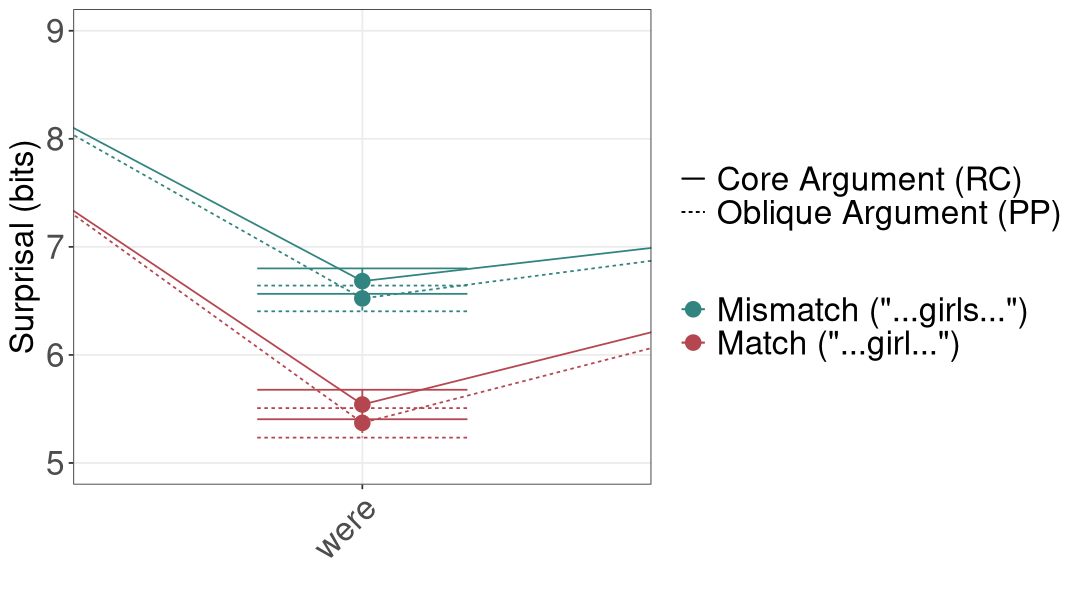

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



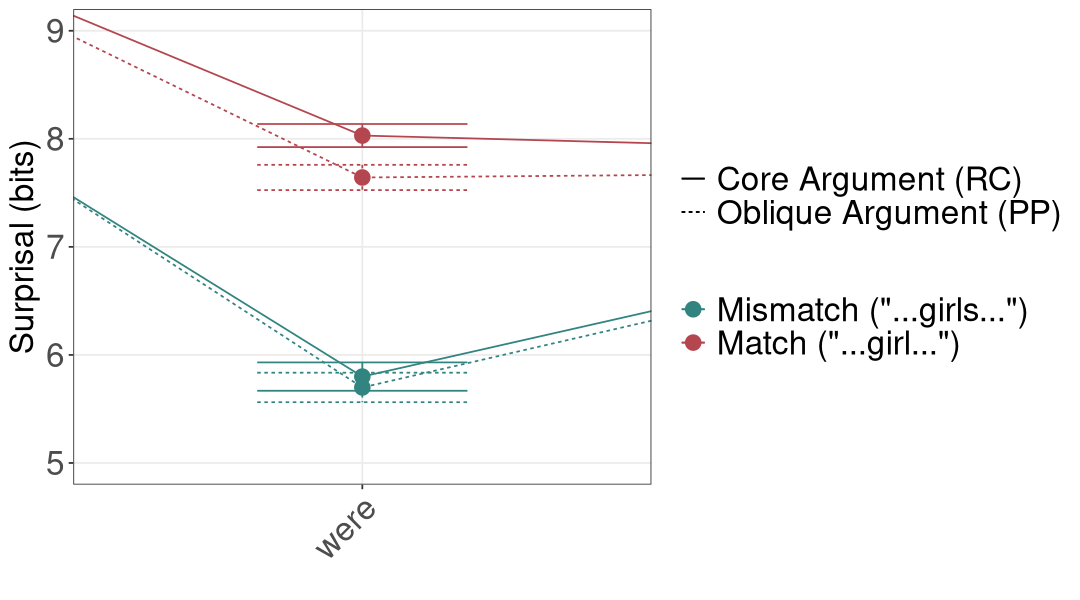

In [14]:
options(repr.plot.width=9, repr.plot.height=5)

plot_pa_spr(subset(pa_df, type=="a" & gram=="G"), "were", c(7.75,8.25), c(5,9))
ggsave("ParkerAn_G_ccgaug_popout.png", width= 9, height = 5)

plot_pa_spr(subset(pa_df, type=="a" & gram=="U"), "were", c(7.75,8.25), c(5,9)) 
ggsave("ParkerAn_U_ccgaug_popout.png", width= 9, height = 5)

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



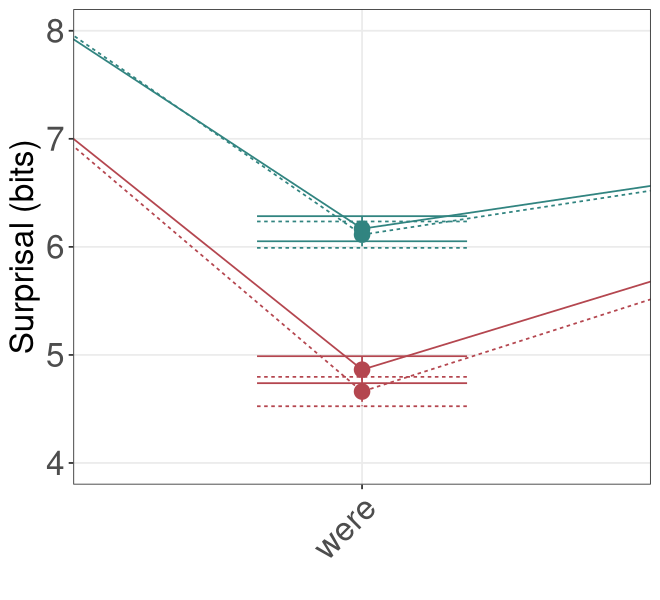

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



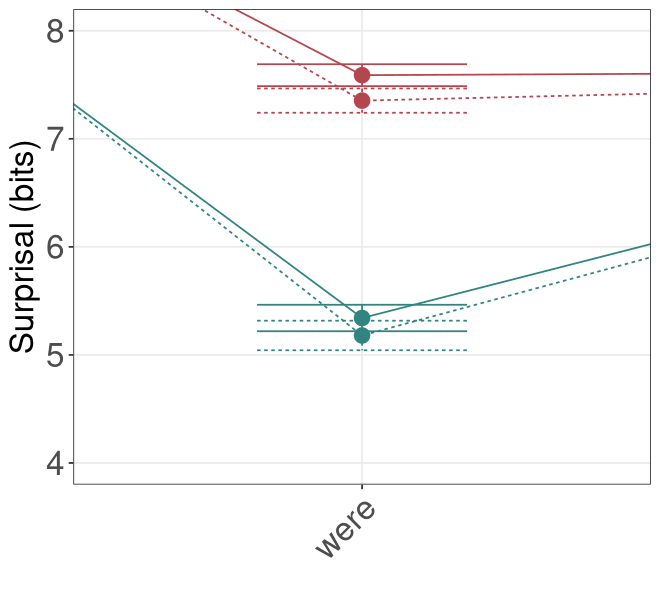

In [28]:
options(repr.plot.width=5.5, repr.plot.height=5)

plot_pa_spr(subset(pa_df, type=="l" & gram=="G"), "were", c(7.75,8.25), c(4,8), no_leg=TRUE)
ggsave("ParkerAn_G_lmonly_popout_noleg.png", width= 5.5, height = 5)

plot_pa_spr(subset(pa_df, type=="l" & gram=="U"), "were", c(7.75,8.25), c(4,8), no_leg=TRUE) 
ggsave("ParkerAn_U_lmonly_popout_noleg.png", width= 5.5, height = 5)

In [16]:
pa_df_verb <- subset(pa_df, pos_adj== 8)

print("grammatical")
pa_lm <- lmer(data=subset(pa_df_verb, pa_df_verb$type == "l" & pa_df_verb$gram=="G"), 
                 surp ~ argument * attr  + (1|item) + (1 | model))

summary(pa_lm)

pr
pa_lm <- lmer(data=subset(pa_df_verb, pa_df_verb$type == "l" & pa_df_verb$gram=="U"), 
                 surp ~ argument * attr  + (1|item) + (1 | model))

summary(pa_lm)

print("ungram - obl")
pa_lm <- lmer(data=subset(pa_df_verb, pa_df_verb$type == "l" & pa_df_verb$gram=="U" & argument=="OBLIQUE"), 
                 surp ~ attr  + (1|item) + (1 | model))

summary(pa_lm)

print("ungram - core")
pa_lm <- lmer(data=subset(pa_df_verb, pa_df_verb$type == "l" & pa_df_verb$gram=="U" & argument=="CORE"), 
                 surp ~ attr  + (1|item) + (1 | model))

summary(pa_lm)

pa_lm <- lmer(data=subset(pa_df_verb, pa_df_verb$type == "a" & pa_df_verb$gram=="G"), 
                 surp ~ argument * attr  + (1|item) + (1 | model))

summary(pa_lm)
pa_lm <- lmer(data=subset(pa_df_verb, pa_df_verb$type == "a" & pa_df_verb$gram=="U"), 
                 surp ~ argument * attr  + (1|item) + (1 | model))

summary(pa_lm)

print("ungram - obl")
pa_lm <- lmer(data=subset(pa_df_verb, pa_df_verb$type == "a" & pa_df_verb$gram=="U" & argument=="OBLIQUE"), 
                 surp ~ attr  + (1|item) + (1 | model))

summary(pa_lm)

print("ungram - core")
pa_lm <- lmer(data=subset(pa_df_verb, pa_df_verb$type == "a" & pa_df_verb$gram=="U" & argument=="CORE"), 
                 surp ~ attr  + (1|item) + (1 | model))

summary(pa_lm)


pa_lm <- lmer(data=subset(pa_df_verb, pa_df_verb$gram=="G"), 
                 surp ~ argument * attr * type  + (1|item) + (1 | model))

summary(pa_lm)
              
pa_lm <- lmer(data=subset(pa_df_verb, pa_df_verb$gram=="U"), 
                 surp ~ argument * attr * type  + (1|item) + (1 | model))

summary(pa_lm)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: surp ~ argument * attr + (1 | item) + (1 | model)
   Data: subset(pa_df_verb, pa_df_verb$type == "l" & pa_df_verb$gram ==  
    "G")

REML criterion at convergence: 2733

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.59775 -0.68751 -0.04417  0.66756  3.11545 

Random effects:
 Groups   Name        Variance Std.Dev.
 item     (Intercept) 2.8911   1.7003  
 model    (Intercept) 0.1387   0.3725  
 Residual             0.7911   0.8895  
Number of obs: 960, groups:  item, 48; model, 5

Fixed effects:
                 Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)       5.45134    0.29800  27.82705  18.293   <2e-16 ***
argument1         0.06434    0.02871 904.99990   2.241   0.0253 *  
attr1             0.68907    0.02871 904.99990  24.003   <2e-16 ***
argument1:attr1  -0.03684    0.02871 904.99990  -1.283   0.1998    
---
Signif. codes:  0 '***' 0.001 '**' 0.0

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: surp ~ argument * attr + (1 | item) + (1 | model)
   Data: subset(pa_df_verb, pa_df_verb$type == "l" & pa_df_verb$gram ==  
    "U")

REML criterion at convergence: 2805.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.99019 -0.69973  0.00064  0.66533  3.11969 

Random effects:
 Groups   Name        Variance Std.Dev.
 item     (Intercept) 2.4792   1.5745  
 model    (Intercept) 0.1175   0.3427  
 Residual             0.8642   0.9296  
Number of obs: 960, groups:  item, 48; model, 5

Fixed effects:
                 Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)       6.36598    0.27576  27.86562  23.085  < 2e-16 ***
argument1         0.09935    0.03000 905.00000   3.311 0.000966 ***
attr1            -1.10521    0.03000 905.00000 -36.835  < 2e-16 ***
argument1:attr1  -0.01846    0.03000 905.00000  -0.615 0.538584    
---
Signif. codes:  0 '***' 0.001 '**' 0

[1] "ungram - obl"


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: surp ~ attr + (1 | item) + (1 | model)
   Data: subset(pa_df_verb, pa_df_verb$type == "l" & pa_df_verb$gram ==  
    "U" & argument == "OBLIQUE")

REML criterion at convergence: 1458.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9208 -0.6757  0.0113  0.5856  2.9591 

Random effects:
 Groups   Name        Variance Std.Dev.
 item     (Intercept) 2.90529  1.7045  
 model    (Intercept) 0.09092  0.3015  
 Residual             0.83127  0.9117  
Number of obs: 480, groups:  item, 48; model, 5

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   6.26663    0.28362  35.62385   22.09   <2e-16 ***
attr1        -1.08675    0.04162 427.00022  -26.11   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
      (Intr)
attr1 0.000 

[1] "ungram - core"


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: surp ~ attr + (1 | item) + (1 | model)
   Data: subset(pa_df_verb, pa_df_verb$type == "l" & pa_df_verb$gram ==  
    "U" & argument == "CORE")

REML criterion at convergence: 1422

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.58479 -0.70268 -0.00146  0.60528  2.80022 

Random effects:
 Groups   Name        Variance Std.Dev.
 item     (Intercept) 2.1601   1.4697  
 model    (Intercept) 0.1538   0.3922  
 Residual             0.7840   0.8855  
Number of obs: 480, groups:  item, 48; model, 5

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   6.46533    0.27822  19.40453   23.24 1.25e-15 ***
attr1        -1.12366    0.04042 427.00000  -27.80  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
      (Intr)
attr1 0.000 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: surp ~ argument * attr + (1 | item) + (1 | model)
   Data: subset(pa_df_verb, pa_df_verb$type == "a" & pa_df_verb$gram ==  
    "G")

REML criterion at convergence: 3170.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7755 -0.6615 -0.0528  0.6389  4.0115 

Random effects:
 Groups   Name        Variance Std.Dev.
 item     (Intercept) 2.1113   1.4530  
 model    (Intercept) 0.6803   0.8248  
 Residual             1.2939   1.1375  
Number of obs: 960, groups:  item, 48; model, 5

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       6.029608   0.425896   6.907237  14.157 2.34e-06 ***
argument1         0.082535   0.036712 905.000785   2.248   0.0248 *  
attr1             0.573298   0.036712 905.000785  15.616  < 2e-16 ***
argument1:attr1  -0.002357   0.036712 905.000785  -0.064   0.9488    
---
Signif. codes:  0 '***' 0.001 '**' 0

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: surp ~ argument * attr + (1 | item) + (1 | model)
   Data: subset(pa_df_verb, pa_df_verb$type == "a" & pa_df_verb$gram ==  
    "U")

REML criterion at convergence: 3168

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4551 -0.6671 -0.0333  0.6692  3.3833 

Random effects:
 Groups   Name        Variance Std.Dev.
 item     (Intercept) 1.8481   1.3595  
 model    (Intercept) 0.6728   0.8203  
 Residual             1.2989   1.1397  
Number of obs: 960, groups:  item, 48; model, 5

Fixed effects:
                 Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)       6.79266    0.41764   6.53930  16.264 1.56e-06 ***
argument1         0.12213    0.03678 904.99970   3.320 0.000936 ***
attr1            -1.04342    0.03678 904.99970 -28.366  < 2e-16 ***
argument1:attr1  -0.07189    0.03678 904.99970  -1.954 0.050976 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05

[1] "ungram - obl"


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: surp ~ attr + (1 | item) + (1 | model)
   Data: subset(pa_df_verb, pa_df_verb$type == "a" & pa_df_verb$gram ==  
    "U" & argument == "OBLIQUE")

REML criterion at convergence: 1622.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8273 -0.6352 -0.0588  0.6138  3.4735 

Random effects:
 Groups   Name        Variance Std.Dev.
 item     (Intercept) 2.2433   1.4978  
 model    (Intercept) 0.5434   0.7371  
 Residual             1.2326   1.1102  
Number of obs: 480, groups:  item, 48; model, 5

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   6.67053    0.39746   7.93583   16.78 1.76e-07 ***
attr1        -0.97153    0.05067 426.99894  -19.17  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
      (Intr)
attr1 0.000 

[1] "ungram - core"


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: surp ~ attr + (1 | item) + (1 | model)
   Data: subset(pa_df_verb, pa_df_verb$type == "a" & pa_df_verb$gram ==  
    "U" & argument == "CORE")

REML criterion at convergence: 1601.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.67047 -0.64016  0.07061  0.62543  2.97268 

Random effects:
 Groups   Name        Variance Std.Dev.
 item     (Intercept) 1.5689   1.2526  
 model    (Intercept) 0.8502   0.9221  
 Residual             1.2128   1.1013  
Number of obs: 480, groups:  item, 48; model, 5

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   6.91479    0.45305   5.63888   15.26 8.42e-06 ***
attr1        -1.11530    0.05027 427.00038  -22.19  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
      (Intr)
attr1 0.000 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: surp ~ argument * attr * type + (1 | item) + (1 | model)
   Data: subset(pa_df_verb, pa_df_verb$gram == "G")

REML criterion at convergence: 8628.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8641 -0.6564 -0.0392  0.6247  4.9283 

Random effects:
 Groups   Name        Variance Std.Dev.
 item     (Intercept) 2.4254   1.5574  
 model    (Intercept) 0.3268   0.5717  
 Residual             1.0446   1.0221  
Number of obs: 2880, groups:  item, 48; model, 15

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            6.030e+00  3.420e-01  3.234e+01  17.629   <2e-16 ***
argument1              8.253e-02  3.299e-02  2.809e+03   2.502   0.0124 *  
attr1                  5.733e-01  3.299e-02  2.809e+03  17.379   <2e-16 ***
typel                 -5.783e-01  3.646e-01  1.200e+01  -1.586   0.1387    
typew                  1.017e-01

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: surp ~ argument * attr * type + (1 | item) + (1 | model)
   Data: subset(pa_df_verb, pa_df_verb$gram == "U")

REML criterion at convergence: 8752.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6158 -0.6419 -0.0521  0.6333  4.5042 

Random effects:
 Groups   Name        Variance Std.Dev.
 item     (Intercept) 2.1360   1.4615  
 model    (Intercept) 0.3354   0.5792  
 Residual             1.0940   1.0460  
Number of obs: 2880, groups:  item, 48; model, 15

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            6.793e+00  3.357e-01  2.950e+01  20.231  < 2e-16 ***
argument1              1.221e-01  3.376e-02  2.809e+03   3.618 0.000302 ***
attr1                 -1.043e+00  3.376e-02  2.809e+03 -30.908  < 2e-16 ***
typel                 -4.267e-01  3.694e-01  1.200e+01  -1.155 0.270550    
typew                  9.338e-02

# Wagers (2009)

In [17]:
wagers_df <- read.csv('../evalsets/Wagers2009/23_illusion/items.csv.reformatc')

wagers_df <- tidyr::separate(wagers_df, "condition", c("subj", "attr", "gram"), sep=c(1,2))
wagers_df <- tidyr::gather(wagers_df, "pos", "surp", 9:18)
wagers_df$pos <- as.numeric(substr(wagers_df$pos, 10,10)) +1
wagers_df$match <- wagers_df$subj == wagers_df$attr
wagers_df$vmatch <- as.factor(xor(wagers_df$match, wagers_df$gram == "U"))

coding_matrix <- matrix(c(1, -1), ncol=1)
wagers_df$match <- as.factor(wagers_df$match)
wagers_df$vmatch <- as.factor(wagers_df$vmatch)
wagers_df$subj <- as.factor(wagers_df$subj)
wagers_df$gram <- as.factor(wagers_df$gram)

contrasts(wagers_df$match) <- coding_matrix
contrasts(wagers_df$vmatch) <- coding_matrix
contrasts(wagers_df$subj) <- coding_matrix
contrasts(wagers_df$gram) <- coding_matrix

wagers_df$type <- substr(wagers_df$model,5, 5)

wagers_df

X,item,subj,attr,gram,model,len,pos,surp,match,vmatch,type
<int>,<int>,<fct>,<chr>,<fct>,<chr>,<int>,<dbl>,<dbl>,<fct>,<fct>,<chr>
0,0,S,S,U,lstmlmaug0,16,1,11.13088,TRUE,FALSE,l
1,0,S,S,U,lstmlmaug1,16,1,10.78847,TRUE,FALSE,l
2,0,S,S,U,lstmlmaug2,16,1,10.95896,TRUE,FALSE,l
3,0,S,S,U,lstmlmaug3,16,1,11.10256,TRUE,FALSE,l
4,0,S,S,U,lstmlmaug4,16,1,10.77436,TRUE,FALSE,l
5,0,S,S,U,lstmaugment0,16,1,10.50309,TRUE,FALSE,a
6,0,S,S,U,lstmaugment1,16,1,10.41498,TRUE,FALSE,a
7,0,S,S,U,lstmaugment2,16,1,10.96050,TRUE,FALSE,a
8,0,S,S,U,lstmaugment3,16,1,11.03740,TRUE,FALSE,a


In [18]:
plot_wagers_spr <- function(dataset, subj, verbg, verbu, width, height) {
    ggplot(dataset, aes(x=pos, y=surp, color=match,linetype=gram, group=interaction(match, gram))) +  
    stat_summary(geom="point", shape=16, size=4) +
    stat_summary(geom="line") +
    stat_summary(geom="errorbar", width=0.4) +
    labs(x="", y="Surprisal (bits)", color="", linetype="") +
    scale_color_manual(labels=c("Mismatch \n(\"The musician... the reviewers...\")", "Match \n(\"The musician... the reviewer...\")"), values=pallette, breaks=c(FALSE, TRUE)) +
    scale_linetype_discrete(labels=c("G"=paste0("Grammatical \n(\"...", subj, " ", verbg, "...\")"), "U"=paste0("Ungrammatical \n(\"...", subj, " ", verbu, "...\")"))) +
    scale_x_continuous(labels=c("The", "musician(s)", "who", "the", subj, "praise(s)", "so", "highly", "will", "probably..."), breaks=0:9, limits=c(0,9)) +
    coord_cartesian(ylim=height, xlim=width) +
    guides(color=guide_legend(order=1), linetype=guide_legend(order=2)) +
    theme_bw() + 
    theme(axis.text.x=element_text(angle=45, hjust=1, size=20), axis.text.y=element_text(size=20),
          axis.title.y=element_text(size=20),
          strip.text=element_text(size=20), legend.text=element_text(size=20), panel.grid.minor=element_blank())
}


Warning message:
"Removed 5760 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 5760 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 5760 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 5760 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 5760 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 5760 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 5760 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 5

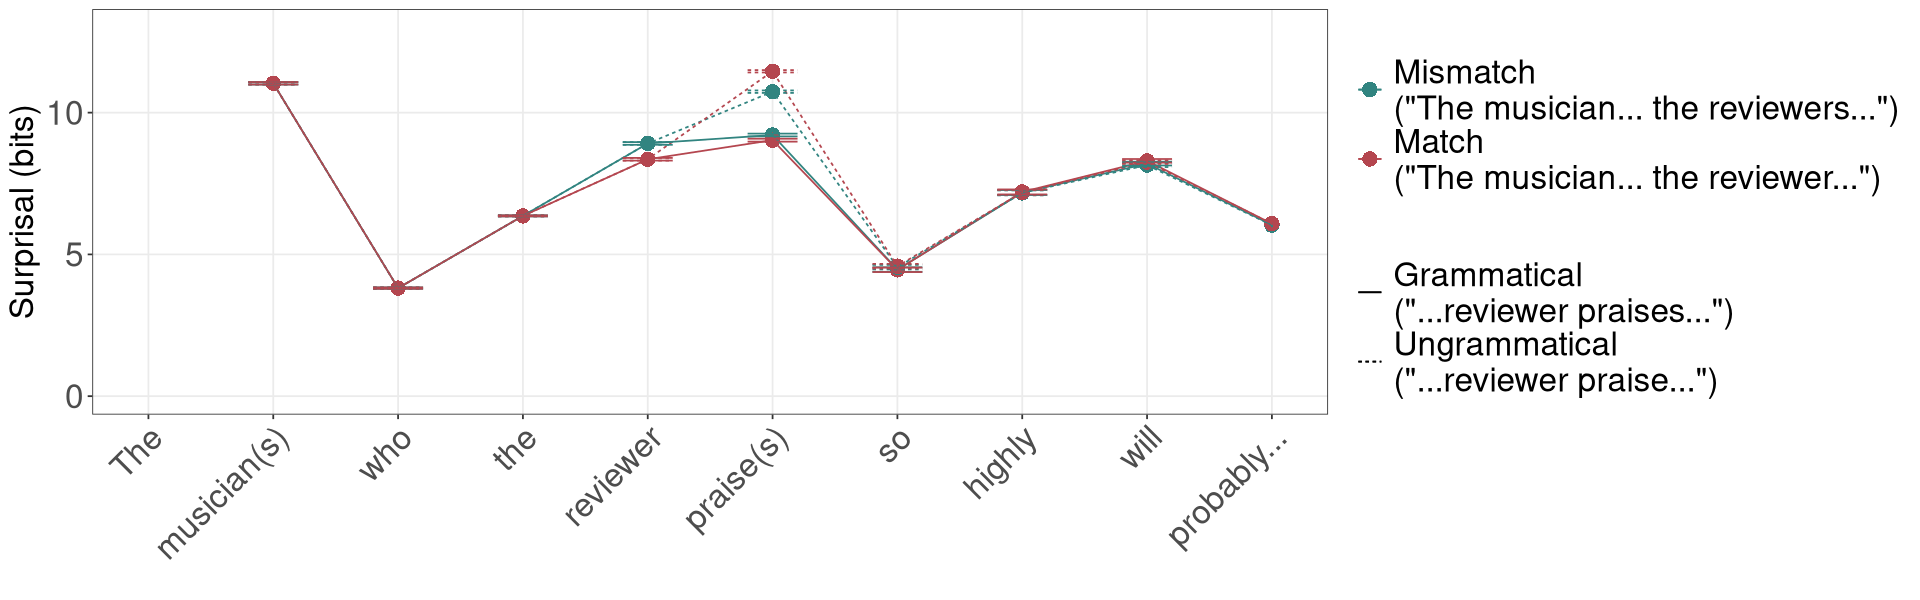

Warning message:
"Removed 5760 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 5760 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 5760 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`



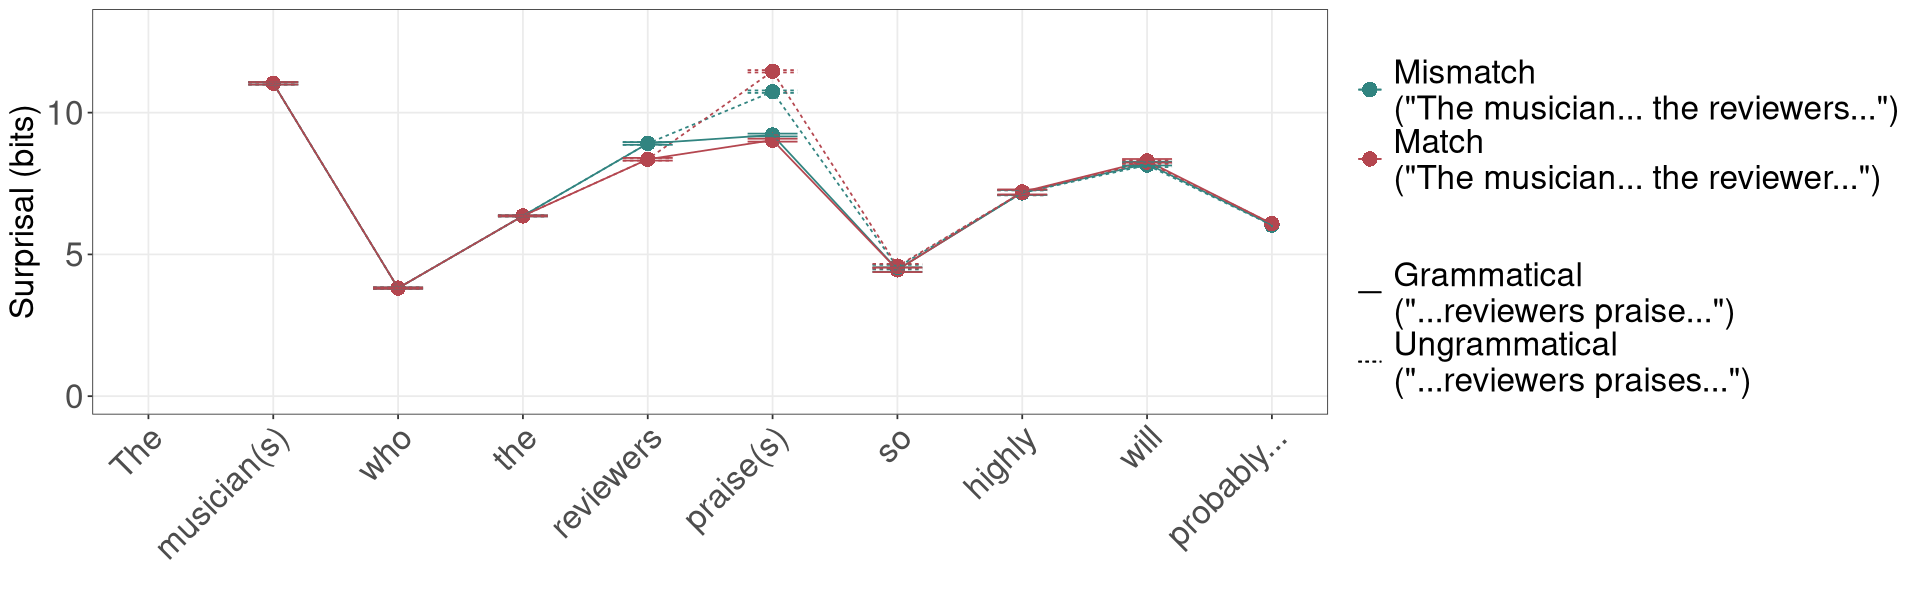

In [19]:
options(repr.plot.width=16, repr.plot.height=5)

plot_wagers_spr(subset(wagers_df, gram="S" & type =="l"), "reviewer", "praises", "praise", c(0,9), c(0,13))
ggsave("Wagers_SSubj_lmonly.png", width= 16, height = 5)

plot_wagers_spr(subset(wagers_df, gram="P" & type == "l"), "reviewers", "praise", "praises", c(0,9), c(0,13))
ggsave("Wagers_PSubj_lmonly.png", width= 16, height = 5)

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows

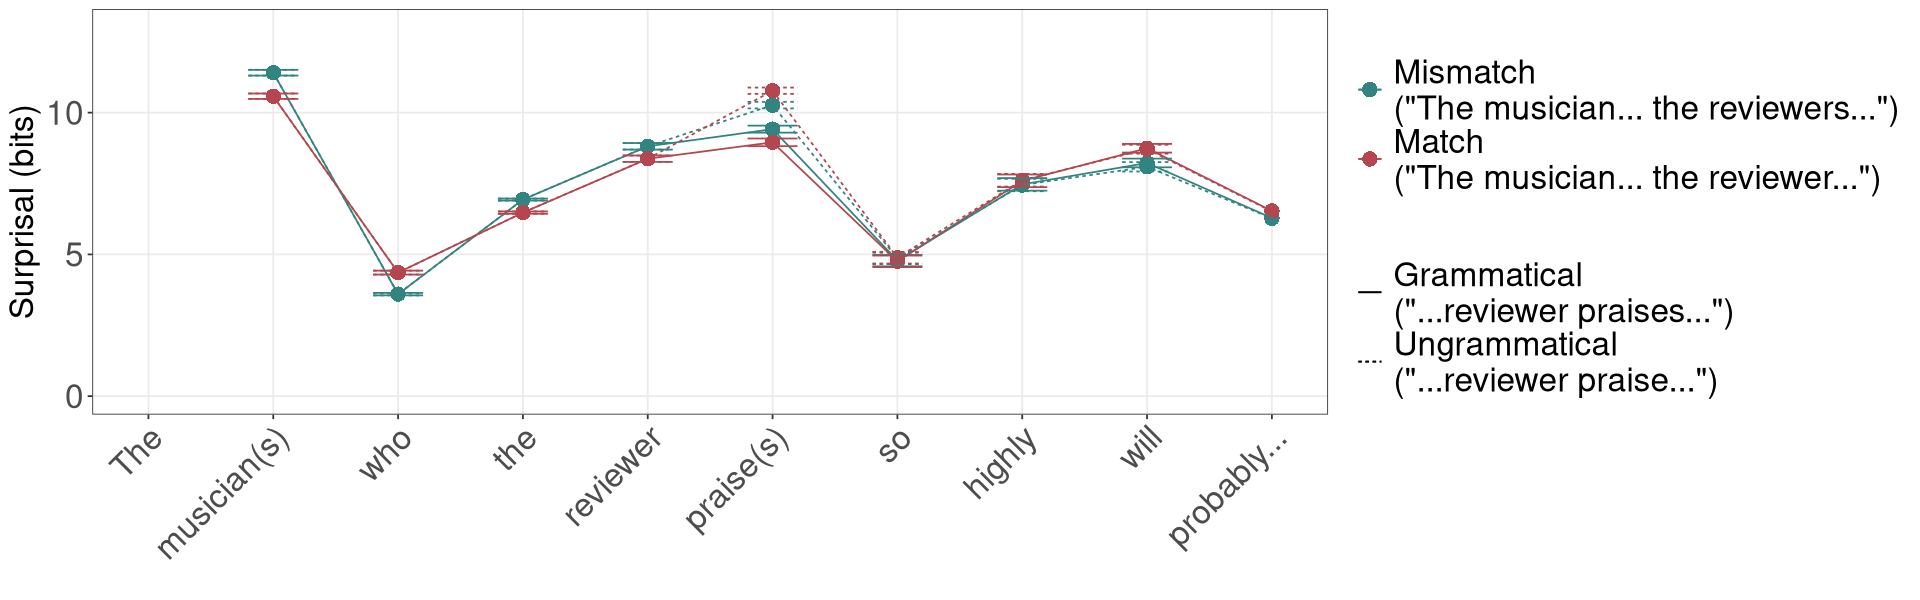

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`



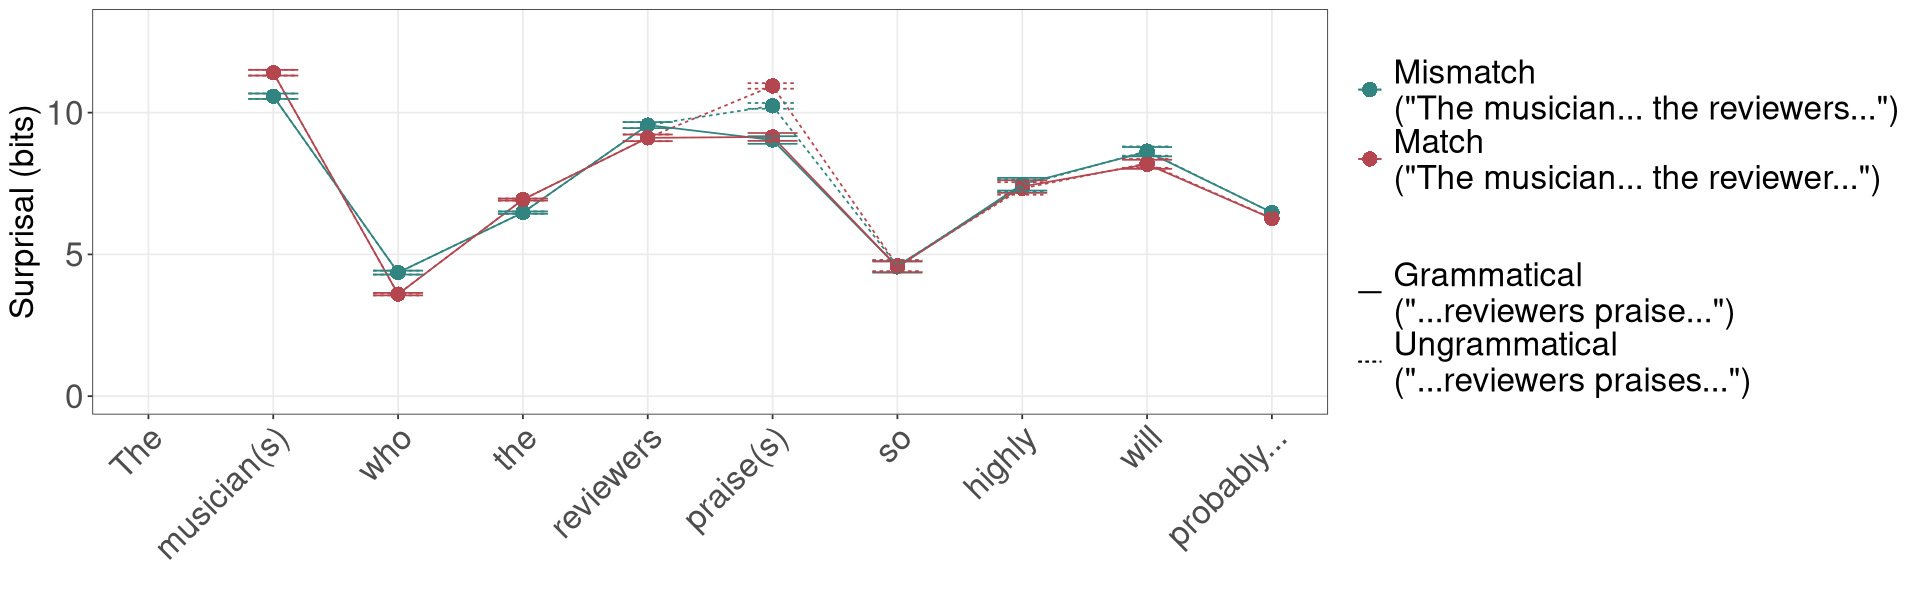

In [20]:
options(repr.plot.width=16, repr.plot.height=5)

plot_wagers_spr(subset(wagers_df, subj=="S" & type =="a"), "reviewer", "praises", "praise", c(0,9), c(0,13))
ggsave("Wagers_SSubj_ccgaug.png", width= 16, height = 5)

plot_wagers_spr(subset(wagers_df, subj=="P" & type == "a"), "reviewers", "praise", "praises", c(0,9), c(0,13))
ggsave("Wagers_SSubj_ccgaug.png", width= 16, height = 5)

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows

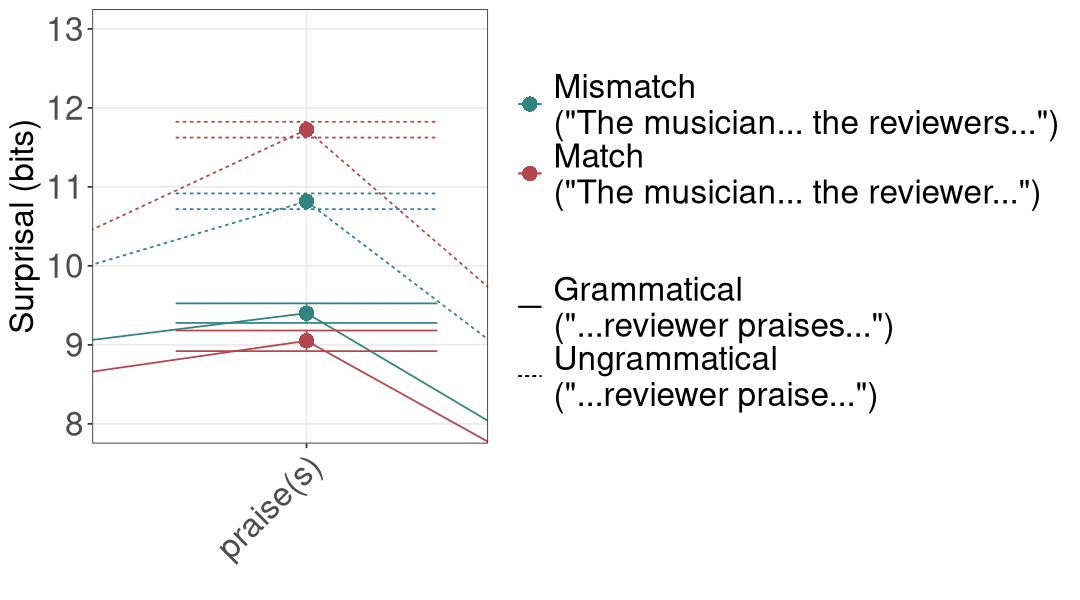

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`

Warning message:
"Removed 960 rows containing non-finite values (stat_summary)."
No summary function supplied, defaulting to `mean_se()`



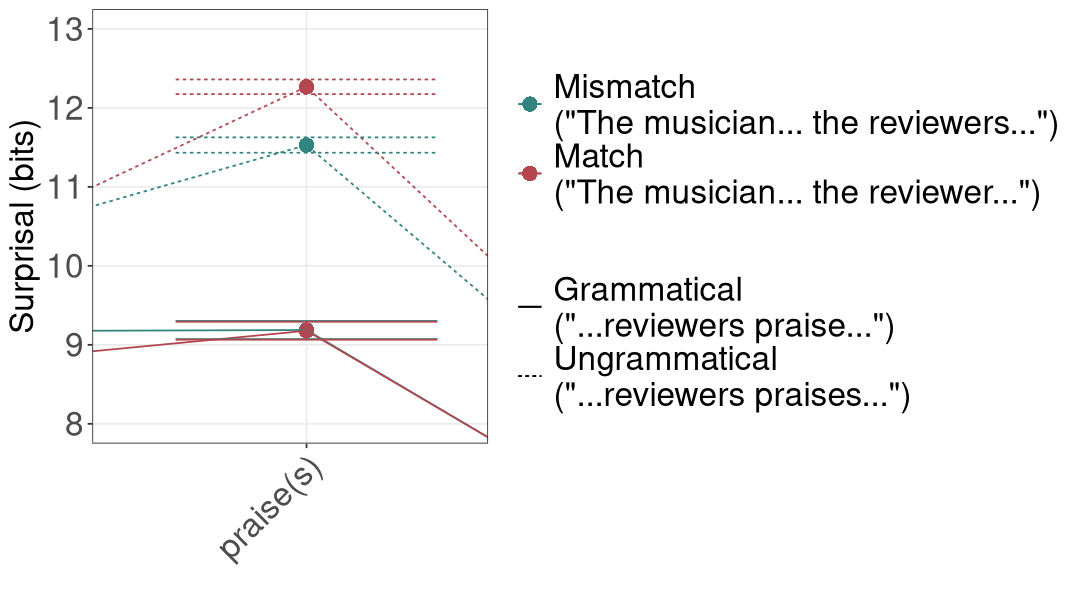

In [27]:
options(repr.plot.width=9, repr.plot.height=5)


plot_wagers_spr(subset(wagers_df, subj=="S" & type=="l"), "reviewer", "praises", "praise", c(4.7,5.25), c(8,13)) 
ggsave("Wagers_SSubj_lmonly_popout.png", width= 9, height = 5)


plot_wagers_spr(subset(wagers_df, subj=="P" & type=="l"), "reviewers", "praise", "praises", c(4.7,5.25), c(8,13))
ggsave("Wagers_PSubj_lmonly_popout.png", width= 9, height = 5)

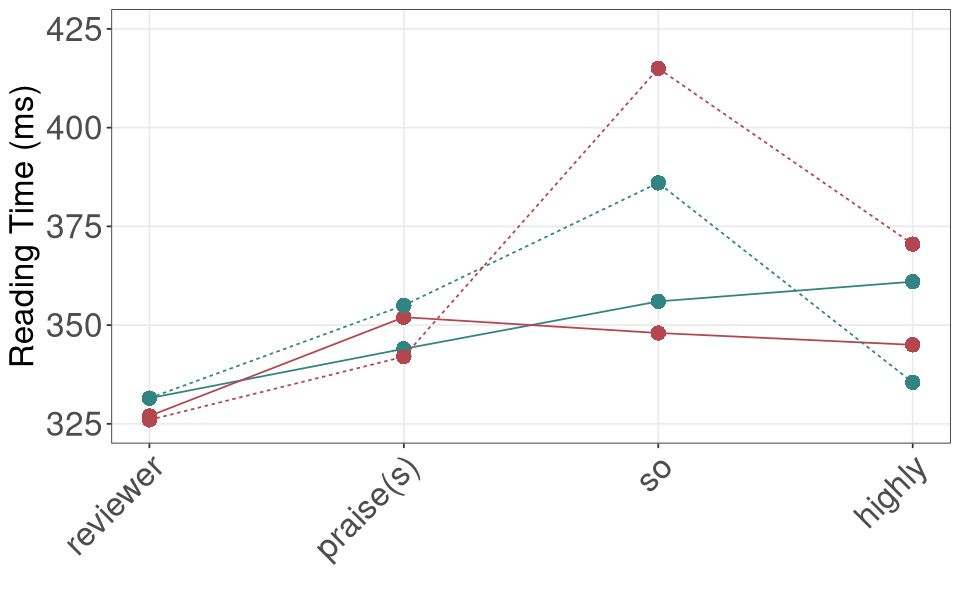

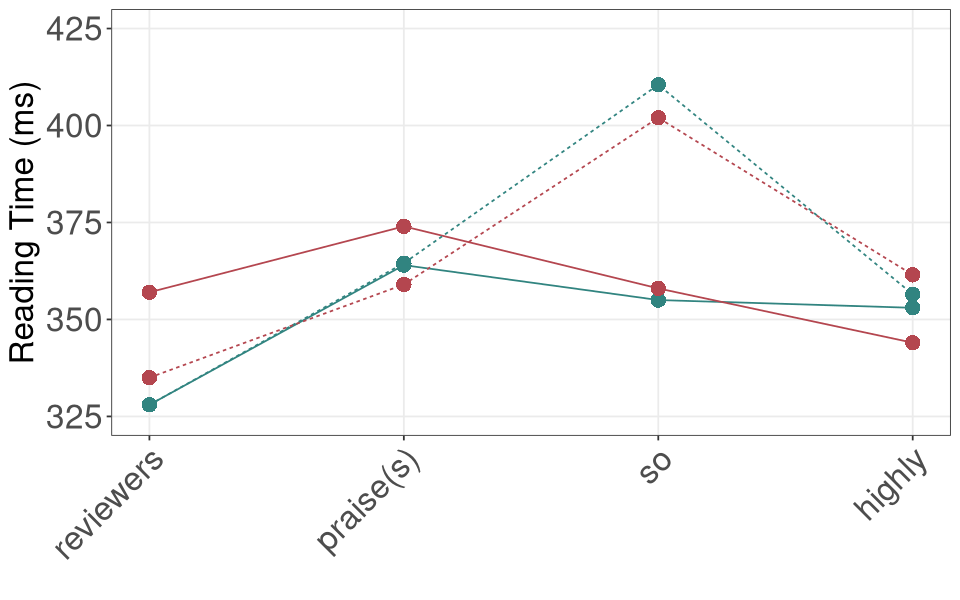

In [22]:
options(repr.plot.width=8, repr.plot.height=5)


wagers_s_human <- data.frame(word=rep(c(0, 1 ,2, 3), 4),
                         attr=rep(c(rep(c("S"), 4), rep(c("P"), 4)),2),
                         gram=rep(c(rep(c("G"), 8), rep(c("U"), 8))),
                         rt=c(327, 352, 348, 345, 331.5, 344, 356, 361, 326, 342, 415, 370.5, 331.5, 355, 386, 335.5))

wagers_p_human <- data.frame(word=rep(c(0, 1 ,2, 3), 4),
                         attr=rep(c(rep(c("S"), 4), rep(c("P"), 4)),2),
                         gram=rep(c(rep(c("G"), 8), rep(c("U"), 8))),
                         rt=c(328, 364, 355, 353, 357, 374, 358, 344, 328, 364.5, 410.5, 356.5, 335, 359, 402, 361.5))
wagers_s_human$match <- factor(wagers_s_human$attr=="S", levels = c(FALSE, TRUE))
wagers_p_human$match <- factor(wagers_p_human$attr=="P", levels = c(FALSE, TRUE))

plot_wagers_human <- function(dataset, subj, verbg, verbu) {
    ggplot(dataset, aes(x=word, y=rt, color=match,linetype=gram, group=interaction(match, gram))) +  
    geom_point(stat="identity", shape=16, size=4) +
    geom_line(stat="identity") +
    labs(x="", y="Reading Time (ms)", color="", linetype="") +
    scale_color_manual(labels=c("Mismatch \n(\"The musician... the reviewers...\")", "Match \n(\"The musician... the reviewer...\")"), values=pallette, breaks=c(FALSE, TRUE)) +
    scale_linetype_discrete(labels=c("G"=paste0("Grammatical \n(\"...", subj, " ", verbg, "...\")"), "U"=paste0("Ungrammatical \n(\"...", subj, " ", verbu, "...\")"))) +
    scale_x_continuous(labels=c(subj, "praise(s)", "so", "highly"), breaks=0:3, limits=c(0,3)) +
    coord_cartesian(ylim=c(325, 425)) +
    guides(color=guide_legend(order=1), linetype=guide_legend(order=2)) +
    theme_bw() + 
    theme(axis.text.x=element_text(angle=45, hjust=1, size=20), axis.text.y=element_text(size=20),
          axis.title.y=element_text(size=20),
          strip.text=element_text(size=20), legend.position="none", panel.grid.minor=element_blank())
}


plot_wagers_human(wagers_s_human, "reviewer", "praises", "praise")
ggsave("Wagers_SSubj_human.png", width=8, height=5)


plot_wagers_human(wagers_p_human, "reviewers", "praise", "praises")
ggsave("Wagers_PSubj_human.png", width=8, height=5)


In [23]:
options(repr.plot.width=6, repr.plot.height=5)


plot_wagers_spr(subset(wagers_df, subj=="S" & type=="a"), "reviewer", c(3.7,5.25), c(7,12)) + theme(legend.position="none")
ggsave("Wagers_SSubj_ccgaug_popout.png", width= 6, height = 5)


plot_wagers_spr(subset(wagers_df, subj=="P" & type=="a"), "reviewers", c(3.7,5.25), c(7,12)) + theme(legend.position="none")
ggsave("Wagers_SSubj_ccgaug_popout.png", width= 6, height = 5)

ERROR: Error in coord_cartesian(ylim = height, xlim = width): argument "width" is missing, with no default


In [29]:
wagers_df_verb <- subset(wagers_df, pos == 5)

wagers_lm <- lmer(data=subset(wagers_df_verb, wagers_df_verb$type == "l" & wagers_df_verb$gram == "G"), 
                 surp ~ match + (1|item) + (1 | model))

summary(wagers_lm)

wagers_lm <- lmer(data=subset(wagers_df_verb, wagers_df_verb$type == "l" & wagers_df_verb$gram == "U"), 
                 surp ~ match+ (1|item) + (1 | model))


summary(wagers_lm)

wagers_lm <- lmer(data=subset(wagers_df_verb, wagers_df_verb$type == "l"), 
                 surp ~ vmatch * gram + (1|item) + (1 | model))

summary(wagers_lm)

wagers_lm <- lmer(data=subset(wagers_df_verb, wagers_df_verb$type == "a" & wagers_df_verb$gram == "G"), 
                 surp ~ match + (1|item) + (1 | model))

summary(wagers_lm)

wagers_lm <- lmer(data=subset(wagers_df_verb, wagers_df_verb$type == "a" & wagers_df_verb$gram == "U"), 
                 surp ~ match+ (1|item) + (1 | model))


summary(wagers_lm)

wagers_lm <- lmer(data=subset(wagers_df_verb, wagers_df_verb$type == "a"), 
                 surp ~ vmatch * gram + (1|item) + (1 | model))

summary(wagers_lm)

wagers_lm <- lmer(data=subset(wagers_df_verb), 
                 surp ~ type * vmatch * gram + (1|item) + (1 | model))

summary(wagers_lm)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: surp ~ match + (1 | item) + (1 | model)
   Data: 
subset(wagers_df_verb, wagers_df_verb$type == "l" & wagers_df_verb$gram ==  
    "G")

REML criterion at convergence: 2665.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1897 -0.6739 -0.0439  0.5647  3.7635 

Random effects:
 Groups   Name        Variance Std.Dev.
 item     (Intercept) 2.72801  1.6517  
 model    (Intercept) 0.09992  0.3161  
 Residual             0.74495  0.8631  
Number of obs: 960, groups:  item, 48; model, 5

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   9.20453    0.27856  33.75618  33.044   <2e-16 ***
match1        0.08985    0.02786 906.99999   3.226   0.0013 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
       (Intr)
match1 0.000 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: surp ~ match + (1 | item) + (1 | model)
   Data: 
subset(wagers_df_verb, wagers_df_verb$type == "l" & wagers_df_verb$gram ==  
    "U")

REML criterion at convergence: 2934.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6850 -0.6129  0.0068  0.6277  3.2220 

Random effects:
 Groups   Name        Variance Std.Dev.
 item     (Intercept) 1.30363  1.1418  
 model    (Intercept) 0.06023  0.2454  
 Residual             1.04169  1.0206  
Number of obs: 960, groups:  item, 48; model, 5

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)  11.58439    0.20072  27.01808   57.71   <2e-16 ***
match1       -0.41116    0.03294 907.00000  -12.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
       (Intr)
match1 0.000 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: surp ~ vmatch * gram + (1 | item) + (1 | model)
   Data: subset(wagers_df_verb, wagers_df_verb$type == "l")

REML criterion at convergence: 5856.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0086 -0.6129 -0.0196  0.5952  4.2121 

Random effects:
 Groups   Name        Variance Std.Dev.
 item     (Intercept) 1.82730  1.3518  
 model    (Intercept) 0.05585  0.2363  
 Residual             1.09772  1.0477  
Number of obs: 1920, groups:  item, 48; model, 5

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)     10.39446    0.22318   37.45870  46.574  < 2e-16 ***
vmatch1          0.25051    0.02391 1865.00000  10.477  < 2e-16 ***
gram1           -1.18993    0.02391 1865.00000 -49.765  < 2e-16 ***
vmatch1:gram1   -0.16065    0.02391 1865.00000  -6.719 2.43e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correl

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: surp ~ match + (1 | item) + (1 | model)
   Data: 
subset(wagers_df_verb, wagers_df_verb$type == "a" & wagers_df_verb$gram ==  
    "G")

REML criterion at convergence: 2778.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9815 -0.6486 -0.0213  0.5811  4.5503 

Random effects:
 Groups   Name        Variance Std.Dev.
 item     (Intercept) 3.45097  1.8577  
 model    (Intercept) 0.04164  0.2041  
 Residual             0.83649  0.9146  
Number of obs: 960, groups:  item, 48; model, 5

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   9.13689    0.28477  49.14389  32.085  < 2e-16 ***
match1        0.08901    0.02952 906.99999   3.016  0.00264 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
       (Intr)
match1 0.000 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: surp ~ match + (1 | item) + (1 | model)
   Data: 
subset(wagers_df_verb, wagers_df_verb$type == "a" & wagers_df_verb$gram ==  
    "U")

REML criterion at convergence: 2765.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8186 -0.6234  0.0021  0.5552  5.0366 

Random effects:
 Groups   Name        Variance Std.Dev.
 item     (Intercept) 1.89875  1.3780  
 model    (Intercept) 0.04768  0.2184  
 Residual             0.84940  0.9216  
Number of obs: 960, groups:  item, 48; model, 5

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)  10.55427    0.22356  40.31925   47.21   <2e-16 ***
match1       -0.30253    0.02975 907.00000  -10.17   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
       (Intr)
match1 0.000 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: surp ~ vmatch * gram + (1 | item) + (1 | model)
   Data: subset(wagers_df_verb, wagers_df_verb$type == "a")

REML criterion at convergence: 5574.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4499 -0.6385 -0.0013  0.5841  4.5563 

Random effects:
 Groups   Name        Variance Std.Dev.
 item     (Intercept) 2.5834   1.6073  
 model    (Intercept) 0.0400   0.2000  
 Residual             0.9364   0.9677  
Number of obs: 1920, groups:  item, 48; model, 5

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      9.84558    0.24962   48.07035  39.443  < 2e-16 ***
vmatch1          0.19577    0.02208 1865.00001   8.865  < 2e-16 ***
gram1           -0.70869    0.02208 1865.00001 -32.090  < 2e-16 ***
vmatch1:gram1   -0.10676    0.02208 1865.00001  -4.834 1.45e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correl

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: surp ~ type * vmatch * gram + (1 | item) + (1 | model)
   Data: subset(wagers_df_verb)

REML criterion at convergence: 17335.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5635 -0.6284 -0.0154  0.5880  4.9863 

Random effects:
 Groups   Name        Variance Std.Dev.
 item     (Intercept) 1.96301  1.4011  
 model    (Intercept) 0.03178  0.1783  
 Residual             1.12002  1.0583  
Number of obs: 5760, groups:  item, 48; model, 15

Fixed effects:
                      Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            9.84558    0.21872   57.29641  45.016  < 2e-16 ***
typel                  0.54888    0.11781   12.00002   4.659 0.000552 ***
typew                  0.24320    0.11781   12.00002   2.064 0.061304 .  
vmatch1                0.19577    0.02415 5689.00005   8.106 6.37e-16 ***
gram1                 -0.70869    0.02415 5689.00005 -29.342  <